In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 5s 0us/step


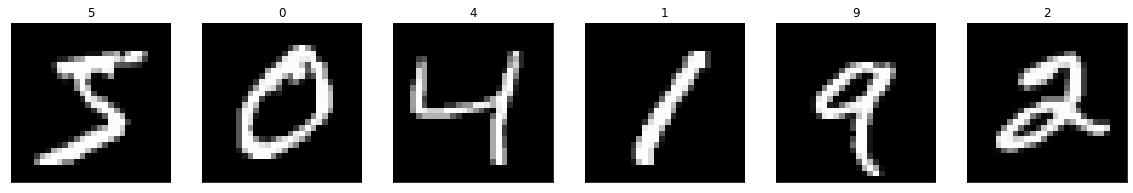

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import numpy as np

fig = plt.figure(figsize = (20,20))
for i in range(6):
    ax  = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow(x_train[i], cmap = 'gray')
    ax.set_title(y_train[i])

In [0]:
#rescale [0-255] ---> [0-1]

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

#one-hot-encoding the data 

from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [4]:
# making the MLP 

from keras.models import Sequential 
from keras.layers import Dense, Flatten 

model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [5]:
#compile the model

model.compile(loss = "categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])
#calculating the accuracy

score = model.evaluate(x_test, y_test, verbose = 0)
accuracy = score[1]*100
accuracy

7.17

In [6]:
#train the model 

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose = 1, save_best_only = True)
hist = model.fit(x_train, y_train, batch_size = 128, callbacks = [checkpoint], epochs = 10, validation_split = 0.2, verbose = 1, shuffle = True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 199us/step - loss: 0.2712 - acc: 0.9151 - val_loss: 0.1566 - val_acc: 0.9523

Epoch 00001: val_loss improved from inf to 0.15656, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 9s 193us/step - loss: 0.1003 - acc: 0.9703 - val_loss: 0.1131 - val_acc: 0.9678

Epoch 00002: val_loss improved from 0.15656 to 0.11307, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 9s 193us/step - loss: 0.0682 - acc: 0.9790 - val_loss: 0.0982 - val_acc: 0.9747

Epoch 00003: val_loss improved from 0.11307 to 0.09821, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.0512 - acc: 0.9853 - val_loss: 0.1014 - val_acc: 0.9753

Epoch 00004: val_lo

In [0]:
model.load_weights('mnist.model.best.hdf5')

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print(accuracy)

97.34
